<a href="https://colab.research.google.com/github/venkatesh-eranti/SVR_Support_Vector_Regression/blob/main/Support_Vector_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reading and understanding the data

## importing the required librariers

In [1]:
# load model
from sklearn.datasets import load_boston
# reading and processing the data
import numpy as np
import pandas as pd
# visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
# supress the warnings
import warnings
warnings.filterwarnings('ignore')
# splitting the data in to train and test
from sklearn.model_selection import train_test_split
# rescaling the features
from sklearn.preprocessing import MinMaxScaler,StandardScaler
# to build a model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
# statsmoldes to build linear regression
import statsmodels.api as sm
# to check multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
# evaluation metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

## loading the data

In [2]:
boston=load_boston()

In [3]:
boston

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [4]:
df=pd.DataFrame(boston['data'],columns=boston['feature_names'])
df['price']=boston['target']

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## understanding the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# visualising the data

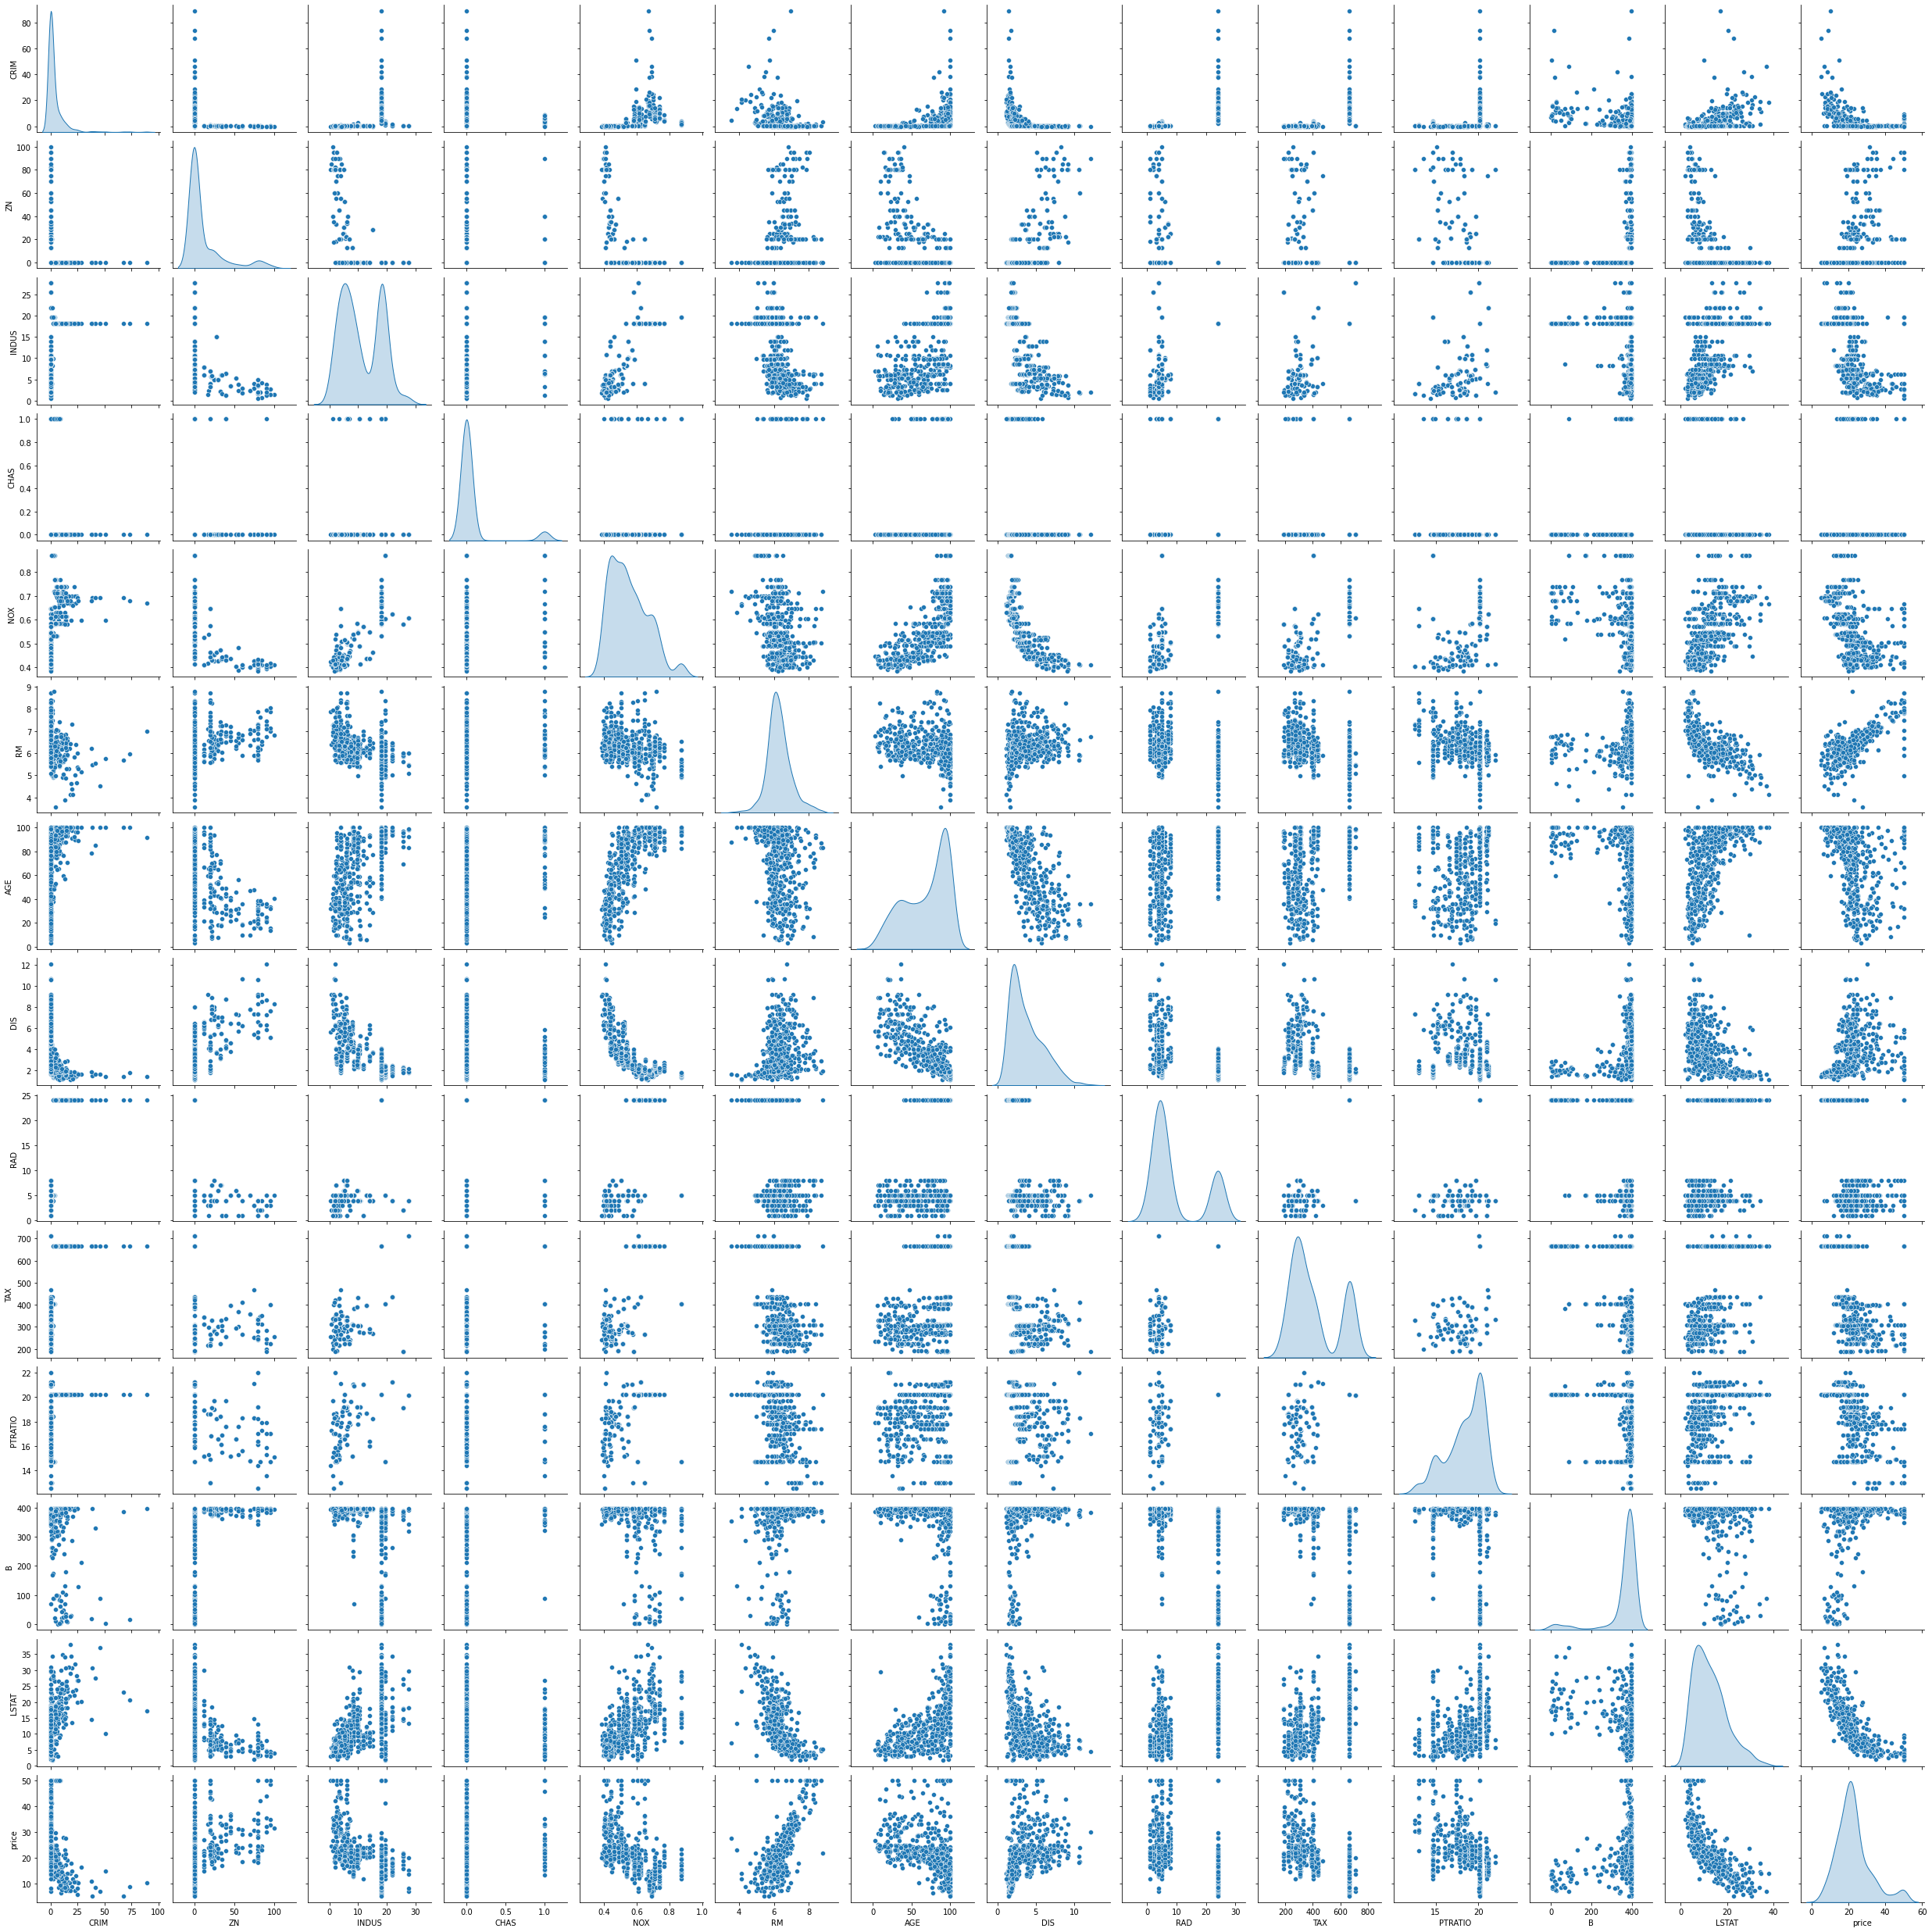

In [8]:
sns.pairplot(df,diag_kind='kde');

# splitting the data in to train and test data

In [9]:
df_train,df_test=train_test_split(df,train_size=0.7,random_state=42)

In [10]:
df_train.shape,df_test.shape

((354, 14), (152, 14))

# Rescaling the features
* scaling of features are required as scaling is not implemented in this SVR algorithm.(linear Regression and other popular algorithms have scalling class by default )

In [11]:
scaler=MinMaxScaler()

In [12]:
df_train[df_train.columns]=scaler.fit_transform(df_train[df_train.columns])
df_test[df_test.columns]=scaler.transform(df_test[df_test.columns])

In [13]:
x_train=df_train.drop('price',axis=1)
y_train=df_train['price']

In [14]:
x_test=df_test.drop('price',axis=1)
y_test=df_test['price']

# building the model

## building normal multiple Linear Regression

In [15]:
linear_regression=LinearRegression()

In [16]:
linear_regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
y_ped_linear_regression=linear_regression.predict(x_train)

In [18]:
y_ped_linear_regression_test=linear_regression.predict(x_test)

### evaluating normal Liner Regression model

In [19]:
r2_score(y_train,y_ped_linear_regression)

0.7434997532004697

In [20]:
r2_score(y_test,y_ped_linear_regression_test)

0.7112260057484927

In [21]:
mean_absolute_error(y_test,y_ped_linear_regression_test)

0.07028244158794232

In [22]:
mean_squared_error(y_test,y_ped_linear_regression_test)

0.010625898385766538

## building SVR model (kernel=rbf)

In [23]:
svr=SVR(kernel='rbf')

In [24]:
svr.fit(x_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [25]:
y_ped_svr_train=svr.predict(x_train)

In [26]:
y_ped_svr_test=svr.predict(x_test)

evaluating svr model with kernel = rbf

In [27]:
r2_score(y_train,y_ped_svr_train)

0.8929788571678169

In [28]:
r2_score(y_test,y_ped_svr_test)

0.8327777767888338

In [29]:
mean_absolute_error(y_test,y_ped_svr_test)

0.055339737029420015

In [30]:
mean_squared_error(y_test,y_ped_svr_test)

0.006153207653928305

### observations from SVR with kernel as rbf
* $R^2$ is increased from 71 to 83. which is quite good
* both mean_absolute_score and mean_squared_error are less compared to liner regression

In [120]:
def model_selection(model,x_train,y_train,x_test,y_test,name):
    model.fit(x_train,y_train)
    print(f'evaluation metrics of {name} model are:')
    r2_train=r2_score(y_train,model.predict(x_train))
    print('r2_score of train model :',r2_train)
    r2_test=r2_score(y_test,model.predict(x_test))
    print('r2_score of test model:',r2_test)
    # if r2_test>(0.95*r2_train):
    #     print('we can accept the model as difference between r2 score for train and test data are less than 5%')
    # elif r2_test>r2_train:
    #     print('we can accept the model as model is performing better in testing data than training data ')
    # else:
    #     print('we can not accept the model as, difference between r2 score for train and test data are greater than 5%')
    print('mean absolute error of train model:',mean_absolute_error(y_test,model.predict(x_test)))
    print('mean squared error of train model:',mean_squared_error(y_test,model.predict(x_test)))

In [121]:
model_selection(SVR(),x_train,y_train,x_test,y_test,'svr with rbf')

evaluation metrics of svr with rbf model are:
r2_score of train model : 0.8929788571678169
r2_score of test model: 0.8327777767888338
mean absolute error of train model: 0.055339737029420015
mean squared error of train model: 0.006153207653928305


In [122]:
model_selection(LinearRegression(),x_train,y_train,x_test,y_test,'Normal Linear regression')

evaluation metrics of Normal Linear regression model are:
r2_score of train model : 0.7434997532004697
r2_score of test model: 0.7112260057484927
mean absolute error of train model: 0.07028244158794232
mean squared error of train model: 0.010625898385766538


In [123]:
model_selection(SVR(kernel='poly'),x_train,y_train,x_test,y_test,'svr with polynomial')

evaluation metrics of svr with polynomial model are:
r2_score of train model : 0.9031786283042299
r2_score of test model: 0.8093432391255345
mean absolute error of train model: 0.0571155281092891
mean squared error of train model: 0.007015518737629142


In [124]:
model_selection(SVR(kernel='linear'),x_train,y_train,x_test,y_test,'svr with linear')


evaluation metrics of svr with linear model are:
r2_score of train model : 0.733927442378039
r2_score of test model: 0.7053528739601855
mean absolute error of train model: 0.0709382702222553
mean squared error of train model: 0.010842009610568918


we can see that clearly SVR algorithm with 'RBF' kernel is outperforming with less `MSE` and `MAE` but with a slight $r^2$ deviation of 7 % from training and testing data. <br> now we will check all the kernels with tuning in free parameters like `C` and `epsilon`if we get any better

In [125]:
from sklearn.model_selection import GridSearchCV

In [126]:
reg=SVR()
grid={'C':[1,10,100,1000,10000],
      'epsilon':[0.1,0.5,1,10,100,1000]}
gs_reg=GridSearchCV(estimator=reg,param_grid=grid,verbose=0)
gs_reg.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100, 1000, 10000],
                         'epsilon': [0.1, 0.5, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [127]:
gs_reg.best_params_

{'C': 10, 'epsilon': 0.1}

In [128]:
model_selection(SVR(C=10,epsilon=0.1,kernel='rbf'),x_train,y_train,x_test,y_test,'svr with rbf')


evaluation metrics of svr with rbf model are:
r2_score of train model : 0.9153513066867418
r2_score of test model: 0.8326776383372642
mean absolute error of train model: 0.055545561129717924
mean squared error of train model: 0.006156892407514392


from GridSearchCV we found out Support vector regression parameters as follows: <br>
1) Regularisation -parameter C =10 <br>
2) epsilon = 0.1 